In [157]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf 

from sklearn.preprocessing import StandardScaler

import time



In [158]:
scaler=StandardScaler()

In [159]:
data=pd.read_csv('/home/jabed/Downloads/Desktop_backup/Desk1/Logistic Regression/Titanic/train_and_test2.csv')
data.dropna(inplace=True)
#X=np.column_stack((data['Age'],data['Sex'],data['Pclass']))
X=data.drop(columns=['2urvived']).values
y=data['2urvived'].values
y=y.reshape((y.shape[0],1))


X_scaled=scaler.fit_transform(X)
X_scaled.shape

(1307, 27)

In [160]:
class Linear(tf.keras.layers.Layer):
    def __init__(self,units=1):
        super(Linear,self).__init__()
        self.units=units
    def build(self,input_shape):
        self.weight=self.add_weight(
            shape=(input_shape[-1],self.units),
            initializer='random_normal',
            trainable=True,

        )    
        self.bias = self.add_weight(
            shape=(self.units,), initializer="random_normal", trainable=True
        )
    def call(self,inputs):
        return tf.matmul(inputs,self.weight)+self.bias 
    def get_config(self):
        return {'units':self.units}




In [161]:
class LogisticRegression(tf.keras.Model):
    def __init__(self):
        super(LogisticRegression,self).__init__()


        self.linear=Linear(1)
        
    def call(self,inputs):
        l1=self.linear(inputs)
        out=tf.nn.sigmoid(l1)
        return out 

    def binary_accuracy(self,y_true,y_pred):

        acc=tf.keras.metrics.BinaryAccuracy()
        acc.update_state(tf.convert_to_tensor(y_true),y_pred)
        return acc.result().numpy()    
           

In [162]:
model=LogisticRegression()

In [163]:
y_pred=model.call(X_scaled)


In [164]:
model.binary_accuracy(y_pred,y)

0.0

In [165]:
def fit(X_train,y_train,num_epochs=100,lr=0.01):
    start=time.time()

    j_history=[]
    loss_fn=tf.keras.losses.BinaryCrossentropy()

    optimizer=tf.keras.optimizers.Adam(learning_rate=lr)
    for epoch in range(num_epochs+1):
        with tf.GradientTape() as tape:
            logits=model.call(X_train)
            loss_value=loss_fn(y_train,logits)


        grads=tape.gradient(loss_value,model.trainable_weights)
        optimizer.apply_gradients(zip(grads,model.trainable_weights))
        acc=model.binary_accuracy(y_train,logits)
        j_history.append((loss_value.numpy(),acc))

        if epoch %10==0:
            print('epoch {} loss {:.4f} and accuracy {:.4f}'.format(epoch,loss_value.numpy(),acc))   
            #print(tf.argmax(logits[0:20],axis=1))  

    end=time.time()
    print('totla time = ',end-start)
    return np.array(j_history)



In [166]:
j_history=fit(X_train=X_scaled,y_train=y,num_epochs=100,lr=0.01)

epoch 0 loss 0.6798 and accuracy 0.6228
epoch 10 loss 0.6092 and accuracy 0.7689
epoch 20 loss 0.5605 and accuracy 0.7888
epoch 30 loss 0.5238 and accuracy 0.8003
epoch 40 loss 0.4959 and accuracy 0.8103
epoch 50 loss 0.4744 and accuracy 0.8171
epoch 60 loss 0.4576 and accuracy 0.8217
epoch 70 loss 0.4443 and accuracy 0.8210
epoch 80 loss 0.4337 and accuracy 0.8248
epoch 90 loss 0.4251 and accuracy 0.8279
epoch 100 loss 0.4181 and accuracy 0.8301


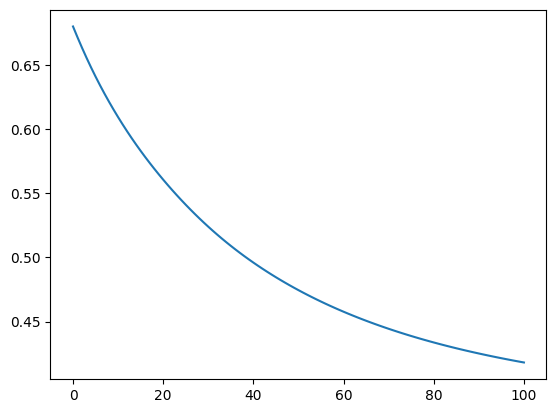

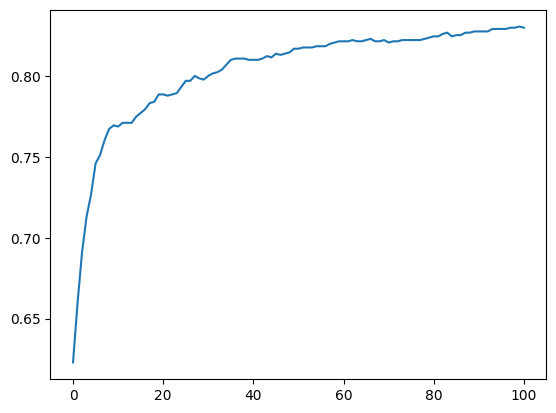

In [170]:
plt.plot(j_history[:,0])
plt.show()
plt.plot(j_history[:,1])